In [76]:
#N be the number of elements;
#k be their rank;
#s be the value of the exponent characterizing the distribution.
import random
import math

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker

def zipf(n_interactions, s, n_users):
    def f(N, k, s):
        global sigma
        return (1/pow(k, s))/sigma

    users = np.arange(n_users)
    random.shuffle(users) # assign rank to users randomly
    
    weights = [0]*n_users
    sigma = sum([1/math.pow(n, s) for n in range(1, n_users + 1)])
    for i, user in enumerate(users):
        weights[i] = f(N=n_users, k = i + 1, s=s)

    transactions = random.choices(users, weights = weights, k = n_interactions)
    return transactions
    
    
def plot_users_frequency(users):
    data = []
    total_access = 0
    for u in users:
        data.append({'user_id': u, 'freq': users[u]})
        total_access += users[u]
    du = pd.DataFrame(data)
    du = du.sort_values(by='freq', ascending=False).reset_index(drop=True).reset_index(drop=False)
    du['prob'] = du['freq']/total_access
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=1)
    sns.set_context(rc = {'patch.linewidth': 1.5, 'patch.color': 'black'})
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(x='index', y='prob', data=du.loc[0:100, :], ax=ax)
    sns.despine()
    ax.set_xlabel(f'User rank (# of distinct users {len(du)})\nbenchmark', fontsize=14)
    ax.set_ylabel(f'Probablity', fontsize=14)
    
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(x='index', y='prob', data=du.loc[0:100, :], ax=ax)
    sns.lineplot(x='index', y='prob', data=du, ax=ax)
    sns.despine()
    ax.set_xlabel(f'User rank (# of distinct users {len(du)})\nbenchmark', fontsize=14)
    ax.set_ylabel(f'Probablity (log-log)', fontsize=14)
    ax.set_xscale('log',base = 2)
    ax.set_yscale('log',base = 2)
    return du


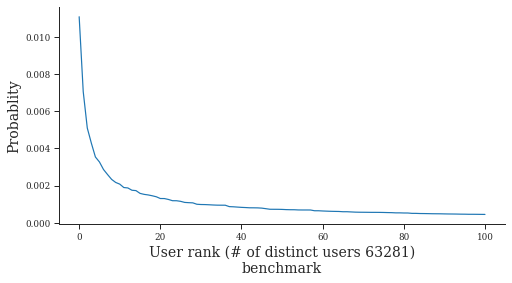

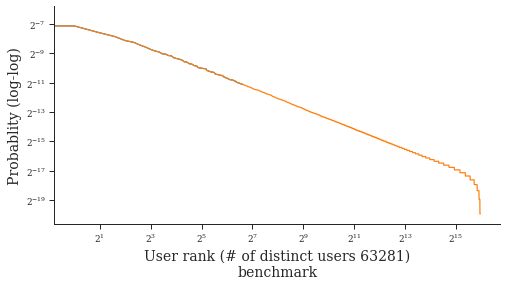

In [69]:
n_users = 63392
n_interactions = 1000000
s = 0.7
transactions = zipf(n_interactions = n_interactions, s = s, n_users=n_users)

users = {}
for user_id in transactions: #[0:11700]:
    if user_id not in users:
        users[user_id] = 0
    users[user_id] += 1
    
du = plot_users_frequency(users)

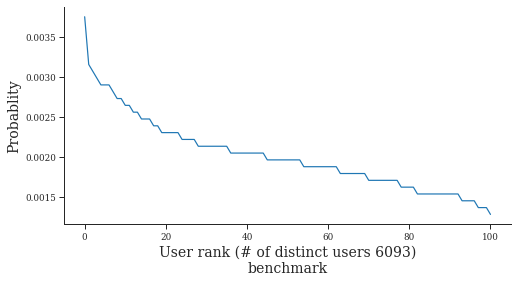

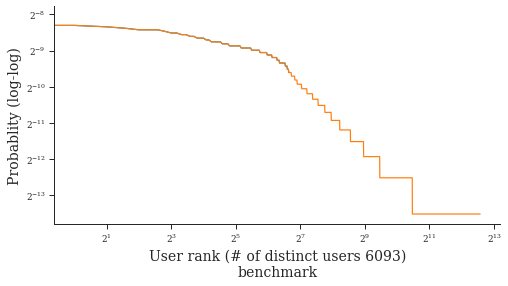

In [66]:
import json
wdir = f'/home/mania/serverless-social-network-multithreaded/functions/results/zipfusers1.2.locust100.512M/'

tpath = os.path.join(wdir, 'trace.json')
with open(tpath, 'r') as fd:
    users = {}
    data = json.load(fd)
    n_requests = len(data)
    for d in data:
        for op in d:
            user_id = d[op]['user_id']
            if user_id not in users:
                users[user_id] = 0
            users[user_id] += 1
    du2 = plot_users_frequency(users)


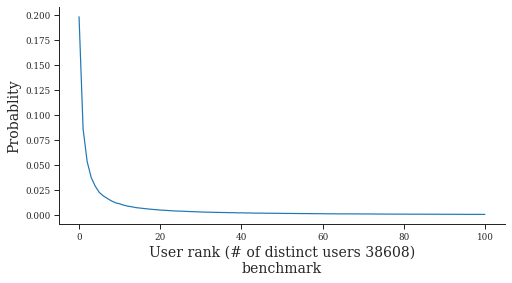

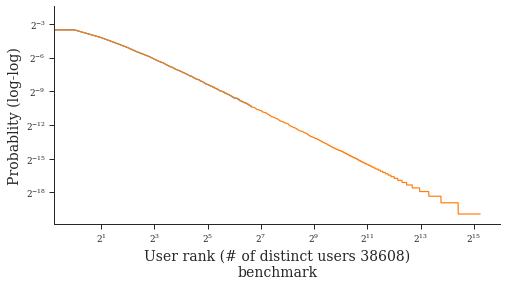

In [133]:
import json
wdir = f'/home/mania/serverless-social-network-multithreaded/functions/results/zipfusers1.2.locust100.512M/'

tpath = os.path.join(wdir, 'users')
with open(tpath, 'r') as fd:
    users = {}
    transactions = json.load(fd)
    n_requests = len(transactions)
    for user_id in transactions: #[0:1260]:
        if user_id not in users:
            users[user_id] = 0
        users[user_id] += 1
        
    du = plot_users_frequency(users)
    

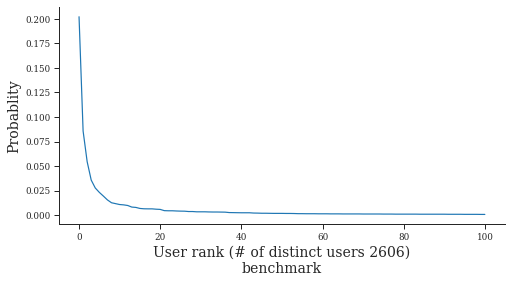

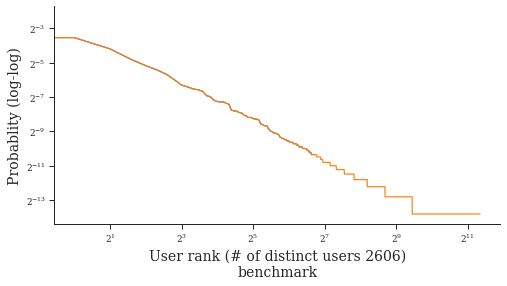

In [138]:
import json
wdir = f'/home/mania/serverless-social-network-multithreaded/functions/results/zipfusers1.2.locust100.512M/'

ul = []
tpath = os.path.join(wdir, 'trace2.json')
with open(tpath, 'r') as fd:
    users1 = {}
    data = json.load(fd)
    n_requests = len(data)
    for d in data:
        for op in d:
            user_id = d[op]['user_id']
            if user_id not in users1:
                users1[user_id] = 0
            users1[user_id] += 1
            ul.append(user_id)
    du2 = plot_users_frequency(users1)


In [137]:
n_requests

1416